# Pitch Quality Grouped

# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Preprocessing](#Preprocessing)
    - [Multicolinearity - VIF](#Multicolinearity---VIF)
- [Analysis](#Analysis)
    - [Run Value by Event](#Run-Value-for-Ball-in-Play-by-Events)
    - [Run Value by Count](#Run-Value-by-Count)
    - [Avg Run Value by Pitch Type](#Average-Run-Value-by-Pitch-Type)
- [Fastball](#Fastball-Analysis)
    - [Fastball xQual](#Fastball-Leaders)
    - [Fastball HB & VB](#Fastball-HB-&-VB)
- [Breaking Ball Analysis](#Breaking-Ball-Analysis)
    - [Breaking Ball xQual](#Breaking-Ball-Leaders)
    - [Breaking Ball HB & VB](#Breaking-Ball-HB-&-VB)
- [Off-Speed Analysis](#Off-Speed-Analysis)
    - [Off-Speed xQual](#Off-Speed-Leaders)
    - [Off-Speed HB & VB](#Off-Speed-HB-&-VB)

# Imports

In [1]:
from sklearn.preprocessing import scale, StandardScaler
from matplotlib.patches import Rectangle
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('../data/model-pitches-rv.csv', index_col = [0])
data.drop(columns = ['plate_x', 'release_pos_x'], inplace = True)
data.rename(columns = {'pfx_-x': 'pfx_x', 
                       'plate_-x': 'plate_x', 
                       'release_pos_-x': 'release_pos_x'}, 
            inplace = True)

rv_pitches = pd.read_csv('../data/pitches-rv-table.csv', index_col = [0])
xrv_grouped = pd.read_csv('../data/xrv_grouped.csv', index_col = [0])

pd.set_option('max_columns', None)
print(xrv_grouped.shape)
xrv_grouped.head()

(705434, 16)


,player_name,p_throws,pitch_type,velo,pfx_x,pfx_z,rv,FF_count,SI_count,FC_count,xRV,CU_count,SL_count,KC_count,CH_count,FS_count
0,"Gsellman, Robert",R,SI,94.3,16.20,10.56,-0.110,0.0,1.0,0.0,0.002900,0.0,0.0,0.0,0.0,0.0
1,"Gsellman, Robert",R,SI,94.3,18.24,5.88,-0.047,0.0,1.0,0.0,0.049818,0.0,0.0,0.0,0.0,0.0
2,"Gsellman, Robert",R,SI,94.2,17.04,6.36,-0.034,0.0,1.0,0.0,0.087840,0.0,0.0,0.0,0.0,0.0
3,"Gsellman, Robert",R,SI,94.1,15.36,4.32,-0.135,0.0,1.0,0.0,0.016247,0.0,0.0,0.0,0.0,0.0
4,"Gsellman, Robert",R,SI,93.6,15.48,6.96,-0.135,0.0,1.0,0.0,0.015419,0.0,0.0,0.0,0.0,0.0


In [3]:
print(rv_pitches.shape)
rv_pitches.head()

(3402, 11)


,player_name,p_throws,pitch_type,n_pitches,velo,HB,VB,RV,RV/100,xRV,xRV/100
0,"Abbott, Cory",R,FF,207.0,92.6,9.6,17.2,5.7,2.7,2.7,1.3
1,"Abreu, Albert",R,FF,103.0,97.8,11.7,15.4,-1.5,-1.5,-3.3,-3.2
2,"Abreu, Bryan",R,FF,310.0,95.7,8.0,17.1,-1.4,-0.4,1.0,0.3
3,"Acevedo, Domingo",R,FF,88.0,92.9,12.2,15.1,2.3,2.6,-0.2,-0.2
4,"Adam, Jason",R,FF,125.0,93.8,7.0,16.8,3.8,3.0,1.0,0.8


In [4]:
rv_pitches.loc[rv_pitches['pitch_type'] == 'FS']

,player_name,p_throws,pitch_type,n_pitches,velo,HB,VB,RV,RV/100,xRV,xRV/100
3346,"Arihara, Kohei",R,FS,61.0,82.8,8.7,4.4,0.1,0.2,0.2,0.3
3347,"Bass, Anthony",R,FS,8.0,87.8,7.2,12.0,2.3,29.0,-0.1,-0.7
3348,"Bednar, David",R,FS,191.0,89.6,3.1,4.8,-6.4,-3.3,-3.7,-1.9
3349,"Bedrosian, Cam",R,FS,116.0,84.3,12.4,12.0,-4.6,-4.0,-3.1,-2.6
3350,"Civale, Aaron",R,FS,262.0,85.6,9.8,6.0,-2.7,-1.0,-1.0,-0.4
...,...,...,...,...,...,...,...,...,...,...,...
3397,"Doolittle, Sean",L,FS,39.0,80.4,-6.8,9.6,0.3,0.8,0.1,0.4
3398,"Gilbert, Tyler",L,FS,38.0,80.1,-11.4,9.3,-0.6,-1.5,-0.5,-1.4
3399,"Gilbreath, Lucas",L,FS,12.0,84.4,-7.6,11.3,1.0,8.7,0.6,4.9
3400,"Shreve, Chasen",L,FS,344.0,82.9,-10.3,3.6,-9.5,-2.8,-9.8,-2.8


# Preprocessing

In [5]:
ff = rv_pitches.loc[(rv_pitches['pitch_type'] == 'FF')] # & (rv_pitches['n_pitches'] > 100)]
fc = rv_pitches.loc[(rv_pitches['pitch_type'] == 'FC')] # & (rv_pitches['n_pitches'] > 100)]
si = rv_pitches.loc[(rv_pitches['pitch_type'] == 'SI')] # & (rv_pitches['n_pitches'] > 100)]
sl = rv_pitches.loc[(rv_pitches['pitch_type'] == 'SL')] # & (rv_pitches['n_pitches'] > 100)]
cu = rv_pitches.loc[(rv_pitches['pitch_type'] == 'CU')] # & (rv_pitches['n_pitches'] > 100)]
ch = rv_pitches.loc[(rv_pitches['pitch_type'] == 'CH')] # & (rv_pitches['n_pitches'] > 100)]
fs = rv_pitches.loc[(rv_pitches['pitch_type'] == 'FS')] # & (rv_pitches['n_pitches'] > 100)]

fb_total = rv_pitches[rv_pitches['pitch_type'].isin(['FF', 'FC', 'SI'])]
bb_total = rv_pitches[rv_pitches['pitch_type'].isin(['SL', 'CU', 'KC'])]
os_total = rv_pitches[rv_pitches['pitch_type'].isin(['CH', 'FS'])]

fb = xrv_grouped[xrv_grouped['pitch_type'].isin(['FF', 'FC', 'SI'])]
bb = xrv_grouped[xrv_grouped['pitch_type'].isin(['SL', 'CU', 'KC'])]
os = xrv_grouped[xrv_grouped['pitch_type'].isin(['CH', 'FS'])]

### Multicolinearity - VIF

**Independent Variables:** Velocity, Vertical Break, Horizontal Break, Release Extension

**Dependent Variable:** rv

In [6]:
features = data[['player_name', 'p_throws', 'pitch_type', 'velo', 
                 'pfx_x', 'pfx_z', 'rv']]
# 'spin_rate', 'release_pos_x', 'release_pos_z', 'release_extension', 'arm_angle'

features_vif = features.select_dtypes([np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = features_vif.columns

vif_data["VIF"] = [variance_inflation_factor(features_vif.values, i)
                   for i in range(len(features_vif.columns))]

print(vif_data.sort_values(by = 'VIF'))

  feature       VIF
3      rv  1.001963
1   pfx_x  1.058757
0    velo  1.940509
2   pfx_z  2.008945


# Analysis

### Run Value for Ball in Play by Events

In [7]:
data.groupby(['events'], as_index = False)['lin_weight_above_outs', 'lin_weights_above_outs_scale', 'rv'].mean()

,events,lin_weight_above_outs,lin_weights_above_outs_scale,rv
0,double,1.041,1.259,0.770134
1,field_error,0.716,0.866,0.445453
2,field_out,0.000,0.000,-0.271401
3,game_advisory,0.194,0.235,-0.060667
4,hit_by_pitch,0.630,0.762,0.359255
5,home_run,1.657,2.003,1.385794
6,single,0.746,0.902,0.474625
7,triple,1.334,1.613,1.062984
8,walk,0.603,0.729,0.332287


### Run Value by Count

In [8]:
data.groupby(['pitch_count'], as_index = False)['woba', 'wraa_change', 'rv'].mean()

,pitch_count,woba,wraa_change,rv
0,0-0,0.314,-0.009612,0.002206
1,0-1,0.265,-0.018634,-0.003365
2,0-2,0.197,-0.067630,-0.067365
3,1-0,0.356,-0.008224,0.006870
4,1-1,0.300,-0.021001,0.001974
...,...,...,...,...
8,2-2,0.269,-0.105299,-0.069878
9,3-0,0.540,0.006415,0.096440
10,3-1,0.477,-0.006323,0.083824
11,3-2,0.379,0.011064,0.023962


### Average Run Value by Pitch Type

In [9]:
#xrv_grouped.groupby(['pitch_type'], as_index = False)['velo', 'pfx_x', 'pfx_z', 'rv', 'xRV'].mean().round(2)

rv_pitches.groupby(['pitch_type'], as_index = False, sort = False)['velo', 'HB', 'VB', 'RV', 'RV/100',
                                                                   'xRV', 'xRV/100'].mean().round(2)

,pitch_type,velo,HB,VB,RV,RV/100,xRV,xRV/100
0,FF,93.30,3.33,15.50,-2.81,0.03,-1.88,-0.07
1,FC,88.23,-1.48,8.02,-1.68,0.71,-1.00,0.05
2,SI,92.82,5.71,10.11,-0.45,0.39,0.19,0.36
3,SL,83.53,-2.79,1.88,-3.63,-0.85,-3.32,-0.98
4,CU,77.54,-3.55,-8.10,-2.07,0.06,-1.85,-0.32
5,CH,85.20,6.00,7.41,-1.29,-0.04,-1.05,-0.52
6,FS,85.58,7.70,4.97,-5.04,4.61,-4.41,2.19


# Grouped Pitches

## Fastball
4-Seam, Cutter, Sinker

In [10]:
fb_r_stats = fb.loc[fb['p_throws'] == 'R']
fb_l_stats = fb.loc[fb['p_throws'] == 'L']

fb_r_avg = fb_r_stats.groupby(['pitch_type', 'p_throws'], 
                              as_index = False, 
                              sort = False)['velo', 'pfx_x', 'pfx_z'].mean()
fb_l_avg = fb_l_stats.groupby(['pitch_type', 'p_throws'], 
                              as_index = False, 
                              sort = False)['velo', 'pfx_x', 'pfx_z'].mean()
fb_avg = pd.concat([fb_r_avg, fb_l_avg], ignore_index = True)
fb_avg = fb_avg.round(1)
fb_avg.head(6)

,pitch_type,p_throws,velo,pfx_x,pfx_z
0,SI,R,93.4,14.8,9.2
1,FF,R,94.1,7.1,16.1
2,FC,R,89.5,-3.0,7.9
3,FF,L,92.8,-7.5,16.2
4,SI,L,92.1,-15.0,9.3
5,FC,L,86.8,1.7,7.9


In [11]:
fb[['rv', 'xRV']].describe()

,rv,xRV
count,406278.000000,406278.000000
mean,-0.007055,-0.003710
std,0.259753,0.156356
min,-1.860000,-1.182200
25%,-0.060000,-0.060868
50%,-0.034000,-0.017918
75%,0.028000,0.027430
max,3.760000,2.353194


### Fastball xQual Leaders

In [12]:
fb['RV/100'] = round(((fb['rv'] / (fb['FF_count'] + fb['SI_count'] + fb['FC_count'])) * 100), 2)
fb['xRV/100'] = round(((fb['xRV'] / (fb['FF_count'] + fb['SI_count'] + fb['FC_count'])) * 100), 2)

cols = list(fb[['rv', 'xRV']])
fb[cols]

for col in cols:
    col_zscore = col + '_zscore'
    fb[col_zscore] = ((fb[col] - fb[col].mean()) / fb[col].std() * -1)

stats = fb.groupby(['player_name', 'p_throws', 'pitch_type'], 
                   as_index = False)['FF_count', 'SI_count', 'FC_count',
                                     'rv', 'xRV', 'rv_zscore', 'xRV_zscore'].sum()

fb = pd.merge(fb, stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])   

fb['Qual'] = fb['rv_zscore_y'] + 100
fb['xQual'] = fb['xRV_zscore_y'] + 100

fb_r_stats = fb.loc[fb['p_throws'] == 'R']
fb_l_stats = fb.loc[fb['p_throws'] == 'L']

group_stats = fb.groupby(['player_name', 'p_throws', 'pitch_type'], 
                         as_index = False)['velo', 'pfx_x', 'pfx_z',
                                           'RV/100', 'Qual', 'xRV/100', 'xQual'].mean()

stats = pd.merge(stats, group_stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])
group_stats = group_stats.round(2)
group_stats = stats.reindex(columns = ['player_name', 'p_throws', 'pitch_type', 'FF_count', 'SI_count', 
                                       'FC_count', 'velo', 'pfx_x', 'pfx_z', 'rv', 'RV/100', 'Qual', 
                                       'xRV', 'xRV/100', 'xQual'])

fb_leaders = group_stats.sort_values(by = ['xQual'], ascending = False)
fb_leaders = fb_leaders.round(1)
fb_leaders.head(10)

,player_name,p_throws,pitch_type,FF_count,SI_count,FC_count,velo,pfx_x,pfx_z,rv,RV/100,Qual,xRV,xRV/100,xQual
269,"Cole, Gerrit",R,FF,1397.0,0.0,0.0,97.7,12.0,18.0,-35.5,-2.5,198.6,-40.7,-2.9,326.9
1116,"Ray, Robbie",L,FF,1864.0,0.0,0.0,94.8,-8.2,17.1,-47.3,-2.5,231.4,-35.2,-1.9,280.7
1276,"Snell, Blake",L,FF,1230.0,0.0,0.0,95.1,-5.8,18.8,-19.3,-1.6,140.9,-28.9,-2.3,255.6
1154,"Rodón, Carlos",L,FF,1302.0,0.0,0.0,95.4,-7.9,17.6,-38.1,-2.9,211.2,-28.4,-2.2,250.8
1460,"Wheeler, Zack",R,FF,1353.0,0.0,0.0,97.2,7.6,15.9,-36.9,-2.7,205.3,-26.2,-1.9,235.3
228,"Cease, Dylan",R,FF,1377.0,0.0,0.0,96.7,4.4,18.8,-6.9,-0.5,89.0,-25.8,-1.9,232.1
491,"Gilbert, Logan",R,FF,1305.0,0.0,0.0,95.3,5.4,18.0,-31.1,-2.4,184.4,-25.1,-1.9,229.6
847,"Matzek, Tyler",L,FF,753.0,0.0,0.0,96.0,-4.9,18.0,-22.8,-3.0,167.3,-21.7,-2.9,221.1
851,"May, Trevor",R,FF,673.0,0.0,0.0,96.5,6.2,17.8,-20.1,-3.0,159.1,-21.3,-3.2,220.5
526,"Green, Chad",R,FF,854.0,0.0,0.0,95.7,4.5,19.3,-27.0,-3.2,180.8,-21.6,-2.5,218.1


In [13]:
fb_leaders.describe()

,FF_count,SI_count,FC_count,velo,pfx_x,pfx_z,rv,RV/100,Qual,xRV,xRV/100,xQual
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,162.342003,70.969441,30.848505,92.399025,3.410143,12.615930,-1.863134,0.252601,99.999350,-0.978153,0.215800,100.001040
std,286.859175,185.313555,119.585077,3.215863,9.785207,4.951021,6.789718,6.402374,22.531839,4.658487,4.155767,27.318218
min,0.000000,0.000000,0.000000,74.400000,-19.500000,-13.500000,-47.300000,-39.000000,-36.100000,-40.700000,-24.600000,-53.200000
25%,0.000000,0.000000,0.000000,90.600000,-3.800000,9.500000,-3.400000,-2.100000,90.025000,-1.800000,-1.300000,88.925000
50%,5.000000,0.000000,0.000000,92.900000,5.500000,13.800000,-0.200000,-0.400000,99.200000,-0.100000,-0.200000,99.200000
75%,215.000000,22.000000,0.000000,94.500000,11.275000,16.400000,1.400000,1.575000,105.775000,1.100000,1.200000,106.275000
max,1864.000000,1782.000000,1354.000000,100.700000,20.100000,22.300000,28.800000,86.000000,231.400000,20.500000,54.100000,326.900000


### RHP Fastball HB & VB xQual

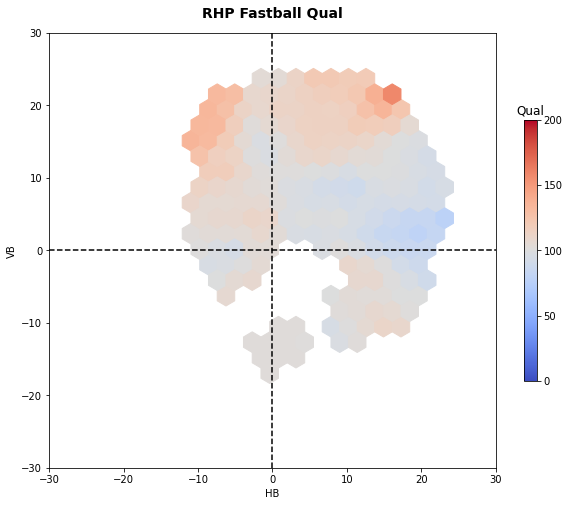

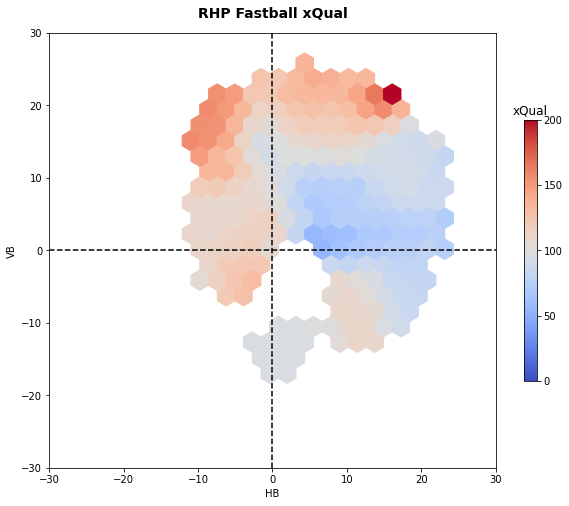

In [14]:
plt.figure(figsize = (10, 8))
plt.hexbin(fb_r_stats['pfx_x'], fb_r_stats['pfx_z'], C = fb_r_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 15, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Fastball Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(fb_r_stats['pfx_x'], fb_r_stats['pfx_z'], C = fb_r_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Fastball xQual', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Fastball HB & VB xQual

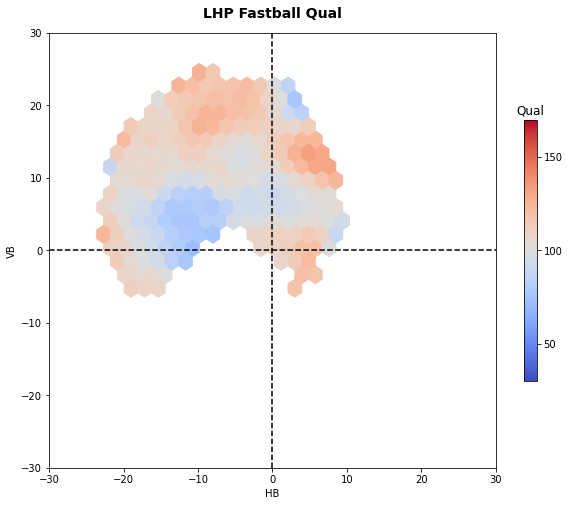

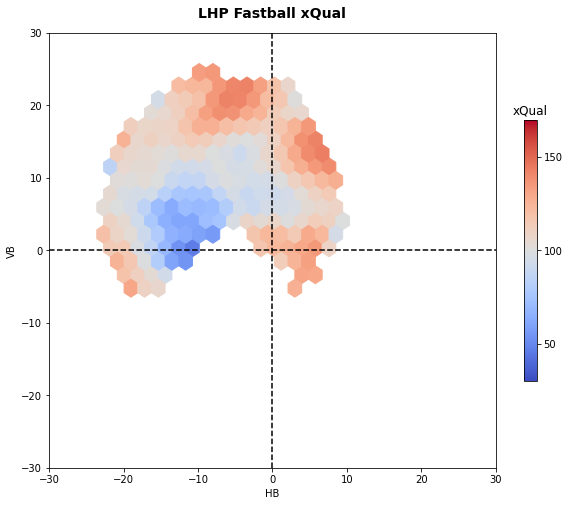

In [15]:
plt.figure(figsize = (10, 8))
plt.hexbin(fb_l_stats['pfx_x'], fb_l_stats['pfx_z'], C = fb_l_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50, 100, 150], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(30, 170)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Fastball Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(fb_l_stats['pfx_x'], fb_l_stats['pfx_z'], C = fb_l_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50, 100, 150], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(30, 170)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Fastball xQual', fontsize = 14, fontweight = 'bold', pad = 15);

If we have a negative z-score the corresponding raw score should be less than the mean, and a positive z-score must correspond to a raw score higher than the mean.

## Breaking Ball
Slider, Curveball, Knuckle Curve

In [16]:
bb_r_stats = bb.loc[bb['p_throws'] == 'R']
bb_l_stats = bb.loc[bb['p_throws'] == 'L']

bb_r_avg = bb_r_stats.groupby(['pitch_type', 'p_throws'], 
                                          as_index = False, 
                                          sort = False)['velo', 'pfx_x', 'pfx_z'].mean()
bb_l_avg = bb_l_stats.groupby(['pitch_type', 'p_throws'], 
                                          as_index = False, 
                                          sort = False)['velo', 'pfx_x', 'pfx_z', ].mean()
bb_avg = pd.concat([bb_r_avg, bb_l_avg], ignore_index = True)
bb_avg = bb_avg.round(1)
bb_avg.head(6)

,pitch_type,p_throws,velo,pfx_x,pfx_z
0,SL,R,84.9,-6.3,1.8
1,CU,R,79.2,-9.6,-9.3
2,KC,R,81.5,-8.3,-11.7
3,SL,L,83.9,5.8,1.5
4,CU,L,77.7,8.4,-7.5
5,KC,L,78.9,5.0,-9.0


In [17]:
bb[['rv', 'xRV']].describe()

,rv,xRV
count,207976.000000,207976.000000
mean,-0.017914,-0.016110
std,0.252237,0.149549
min,-1.860000,-1.162465
25%,-0.060000,-0.067234
50%,-0.034000,-0.021668
75%,0.028000,0.019080
max,3.760000,2.346101


## Breaking Ball Leaders

In [18]:
bb['RV/100'] = round(((bb['rv'] / (bb['CU_count'] + bb['SL_count'] + bb['KC_count'])) * 100), 2)
bb['xRV/100'] = round(((bb['xRV'] / (bb['CU_count'] + bb['SL_count'] + bb['KC_count'])) * 100), 2)

cols = list(bb[['rv', 'xRV', 'RV/100', 'xRV/100']])
bb[cols]

for col in cols:
    col_zscore = col + '_zscore'
    bb[col_zscore] = ((bb[col] - bb[col].mean())/ bb[col].std(ddof=0) * -1)

stats = bb.groupby(['player_name', 'p_throws', 'pitch_type'], 
                       as_index = False)['SL_count', 'CU_count', 'KC_count', 
                                         'rv', 'xRV', 'rv_zscore', 'xRV_zscore'].sum()
bb = pd.merge(bb, stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])
bb['Qual'] = bb['rv_zscore_y'] + 100
bb['xQual'] = bb['xRV_zscore_y'] + 100
bb_r_stats = bb.loc[bb['p_throws'] == 'R']
bb_l_stats = bb.loc[bb['p_throws'] == 'L']

q_stats = bb.groupby(['player_name', 'p_throws', 'pitch_type'], 
                                 as_index = False)['velo', 'pfx_x', 'pfx_z', 'RV/100', 
                                                   'xRV/100', 'Qual', 'xQual'].mean()

stats = pd.merge(stats, q_stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])
stats = stats.round(2)
stats = stats.reindex(columns = ['player_name', 'p_throws', 'pitch_type', 'SL_count', 'CU_count', 'KC_count',
                                 'velo', 'pfx_x', 'pfx_z', 'rv', 'RV/100', 'Qual', 'xRV', 'xRV/100', 'xQual'])

bb_leaders = stats.sort_values(by = ['xQual'], ascending = False)
bb_leaders.head(10)

,player_name,p_throws,pitch_type,SL_count,CU_count,KC_count,velo,pfx_x,pfx_z,rv,RV/100,Qual,xRV,xRV/100,xQual
690,"McClanahan, Shane",L,SL,674.0,0.0,0.0,89.15,3.79,2.03,-22.52,-3.34,141.42,-33.53,-4.97,251.59
692,"McCullers Jr., Lance",R,SL,719.0,0.0,0.0,85.99,-13.67,4.59,-26.25,-3.65,153.00,-32.53,-4.52,240.07
1126,"Urías, Julio",L,CU,0.0,952.0,0.0,81.38,15.78,-0.93,-38.70,-4.06,185.80,-33.25,-3.49,219.78
766,"Musgrove, Joe",R,SL,815.0,0.0,0.0,84.07,-14.03,-1.56,-30.26,-3.71,162.08,-28.38,-3.48,201.99
1142,"Wainwright, Adam",R,CU,0.0,1027.0,0.0,73.47,-16.59,-14.75,-30.22,-2.94,146.87,-30.78,-3.00,195.22
928,"Rodón, Carlos",L,SL,603.0,0.0,0.0,85.76,8.21,-1.06,-30.09,-4.99,176.45,-23.18,-3.84,190.08
145,"Bummer, Aaron",L,SL,281.0,0.0,0.0,82.96,17.92,-5.02,-17.27,-6.15,148.53,-17.77,-6.32,188.56
803,"Ohtani, Shohei",R,SL,440.0,0.0,0.0,82.21,-15.88,3.04,-18.64,-4.24,142.66,-19.82,-4.50,185.13
697,"McHugh, Collin",R,SL,514.0,0.0,0.0,79.47,-18.72,-0.61,-24.55,-4.78,160.83,-21.01,-4.09,185.10
1221,"deGrom, Jacob",R,SL,409.0,0.0,0.0,91.57,-4.67,3.46,-22.48,-5.50,160.07,-19.02,-4.65,183.11


In [19]:
bb[['Qual', 'xQual']].describe()

,Qual,xQual
count,207976.000000,207976.000000
mean,104.935635,106.219738
std,24.188540,32.845392
min,38.903017,22.337759
25%,89.612323,86.513527
50%,101.897641,101.611116
75%,120.199997,120.339719
max,185.795019,251.589867


### RHP Breaking Ball HB & VB

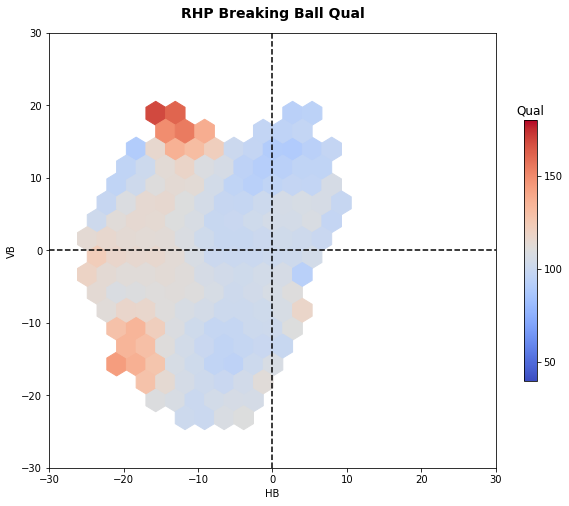

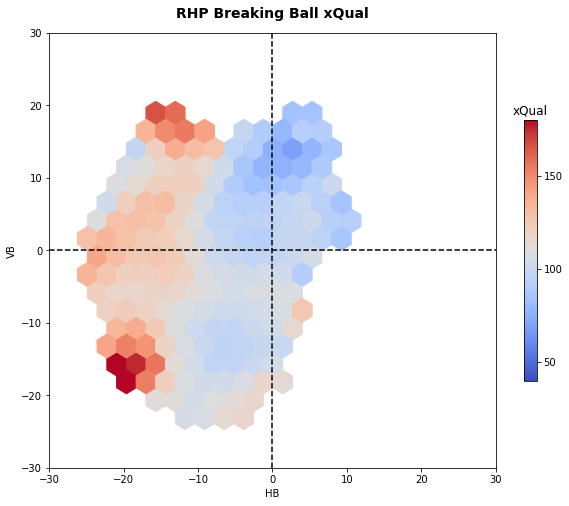

In [20]:
plt.figure(figsize = (10, 8))
plt.hexbin(bb_r_stats['pfx_x'], bb_r_stats['pfx_z'], C = bb_r_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 15, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Breaking Ball Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(bb_r_stats['pfx_x'], bb_r_stats['pfx_z'], C = bb_r_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Breaking Ball xQual', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Breaking Ball HB & VB

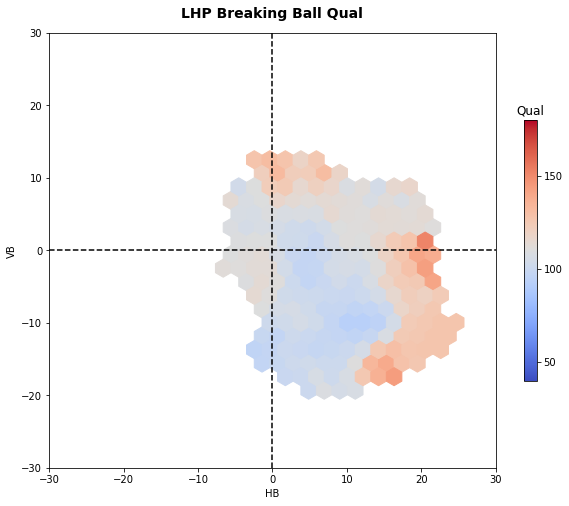

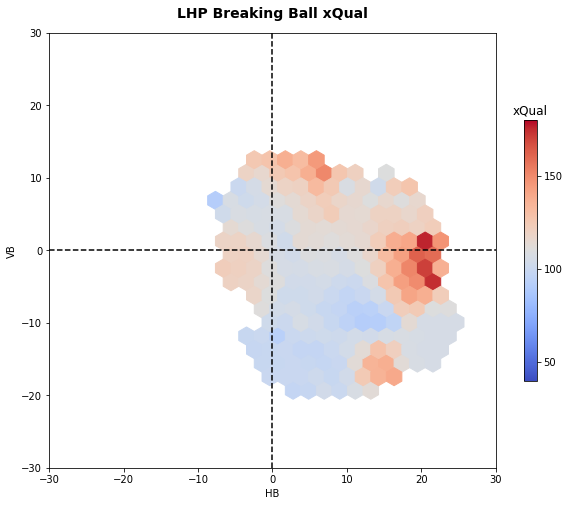

In [21]:
plt.figure(figsize = (10, 8))
plt.hexbin(bb_l_stats['pfx_x'], bb_l_stats['pfx_z'], C = bb_l_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 15, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Breaking Ball Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(bb_l_stats['pfx_x'], bb_l_stats['pfx_z'], C = bb_l_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Breaking Ball xQual', fontsize = 14, fontweight = 'bold', pad = 15);

## Off-Speed
Changeup, Splitter

In [22]:
os_r_stats = os.loc[os['p_throws'] == 'R']
os_l_stats = os.loc[os['p_throws'] == 'L']

os_r_avg = os_r_stats.groupby(['pitch_type', 'p_throws'], 
                                          as_index = False, 
                                          sort = False)['velo', 'pfx_x', 'pfx_z'].mean()
os_l_avg = os_l_stats.groupby(['pitch_type', 'p_throws'], 
                                          as_index = False, 
                                          sort = False)['velo', 'pfx_x', 'pfx_z'].mean()
os_avg = pd.concat([os_r_avg, os_l_avg], ignore_index = True)
os_avg = os_avg.round(1)
os_avg.head(6)

,pitch_type,p_throws,velo,pfx_x,pfx_z
0,CH,R,85.5,13.8,6.3
1,FS,R,85.8,10.7,3.9
2,CH,L,83.6,-13.9,7.8
3,FS,L,83.8,-8.7,4.0


In [23]:
os[['rv', 'xRV']].describe()

,rv,xRV
count,91180.000000,91180.000000
mean,-0.012305,-0.010533
std,0.261507,0.154700
min,-1.720000,-1.093706
25%,-0.067000,-0.067646
50%,-0.034000,-0.017797
75%,0.032000,0.026237
max,3.340000,2.217406


### Off-Speed Leaders

In [24]:
os['RV/100'] = round(((os['rv'] / (os['CH_count'] + os['FS_count'])) * 100), 2)
os['xRV/100'] = round(((os['xRV'] / (os['CH_count'] + os['FS_count'])) * 100), 2)

cols = list(os[['rv', 'xRV', 'RV/100', 'xRV/100']])
os[cols]

for col in cols:
    col_zscore = col + '_zscore'
    os[col_zscore] = ((os[col] - os[col].mean()) / os[col].std(ddof=0) * -1)

stats = os.groupby(['player_name', 'p_throws', 'pitch_type'], 
                       as_index = False)['CH_count', 'FS_count', 'rv', 'xRV', 
                                         'rv_zscore', 'xRV_zscore'].sum()
os = pd.merge(os, stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])
os['Qual'] = os['rv_zscore_y'] + 100
os['xQual'] = os['xRV_zscore_y'] + 100
os_r_stats = os.loc[os['p_throws'] == 'R']
os_l_stats = os.loc[os['p_throws'] == 'L']

q_stats = os.groupby(['player_name', 'p_throws', 'pitch_type'], 
                     as_index = False)['velo', 'pfx_x', 'pfx_z', 'RV/100', 
                                       'xRV/100', 'Qual', 'xQual'].mean()

stats = pd.merge(stats, q_stats, how = 'left', on = ['player_name', 'p_throws', 'pitch_type'])
stats = stats.round(2)
stats = stats.reindex(columns = ['player_name', 'p_throws', 'pitch_type', 'CH_count', 'FS_count', 'velo', 
                                 'pfx_x', 'pfx_z', 'rv', 'RV/100', 'Qual', 'xRV', 'xRV/100', 'xQual'])

os_leaders = stats.sort_values(by = ['xQual'], ascending = False)
os_leaders.head(10)

,player_name,p_throws,pitch_type,CH_count,FS_count,velo,pfx_x,pfx_z,rv,RV/100,Qual,xRV,xRV/100,xQual
235,"Gausman, Kevin",R,FS,0.0,1044.0,83.60,12.35,2.20,-49.96,-4.79,241.91,-34.38,-3.29,251.15
683,"Williams, Devin",R,CH,621.0,0.0,83.72,16.96,-4.16,-20.72,-3.34,150.00,-22.73,-3.66,204.62
403,"Matz, Steven",L,CH,598.0,0.0,85.05,-15.94,3.27,-19.88,-3.32,147.86,-20.25,-3.39,190.16
105,"Castillo, Luis",R,CH,952.0,0.0,88.33,16.77,0.94,-28.06,-2.95,162.50,-23.85,-2.50,189.32
485,"Peralta, Wily",R,FS,0.0,352.0,81.27,10.16,6.67,-23.37,-6.64,172.81,-16.97,-4.82,185.71
11,"Alcantara, Sandy",R,CH,728.0,0.0,91.82,16.07,3.31,-18.04,-2.48,134.71,-19.53,-2.68,176.66
466,"Ohtani, Shohei",R,FS,0.0,366.0,88.15,4.88,2.41,-23.49,-6.42,172.61,-15.56,-4.25,175.69
392,"Manaea, Sean",L,CH,723.0,0.0,84.53,-12.18,6.67,-21.37,-2.96,147.70,-18.99,-2.63,173.50
432,"Montas, Frankie",R,FS,0.0,677.0,87.49,11.52,3.82,-27.64,-4.08,173.82,-17.94,-2.65,169.84
244,"Giolito, Lucas",R,CH,940.0,0.0,81.51,10.20,12.86,-21.98,-2.34,139.84,-20.52,-2.18,168.67


In [25]:
os[['Qual', 'xQual']].describe()

,Qual,xQual
count,91180.000000,91180.000000
mean,106.454367,107.192172
std,26.730030,32.025985
min,53.374546,32.240375
25%,89.915159,88.055700
50%,101.887757,101.639431
75%,117.781778,118.689922
max,241.910416,251.152229


### RHP Off-Speed HB & VB

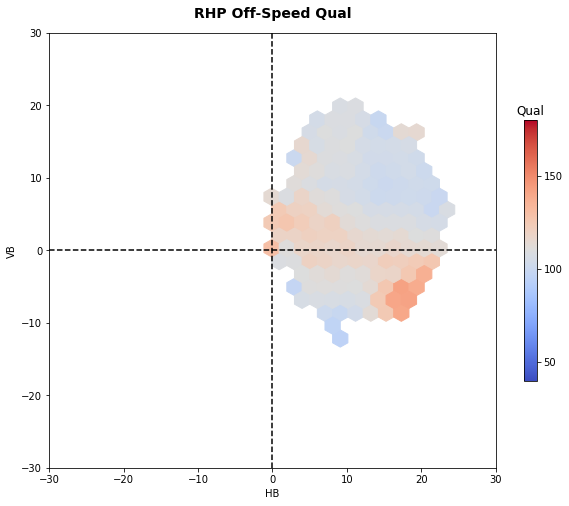

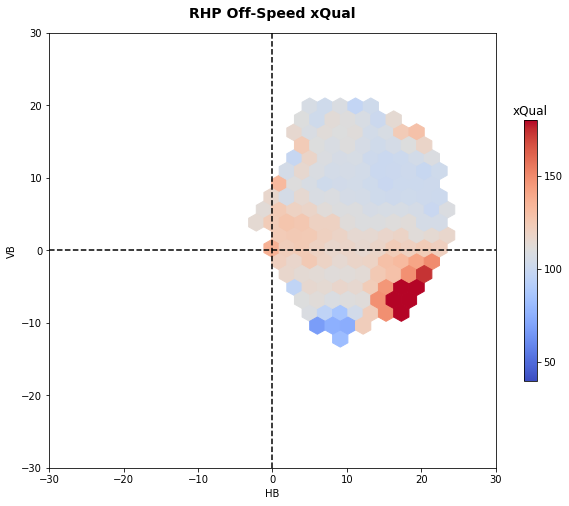

In [26]:
plt.figure(figsize = (10, 8))
plt.hexbin(os_r_stats['pfx_x'], os_r_stats['pfx_z'], C = os_r_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 15, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Off-Speed Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(os_r_stats['pfx_x'], os_r_stats['pfx_z'], C = os_r_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(40, 180)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Off-Speed xQual', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Off-Speed HB & VB

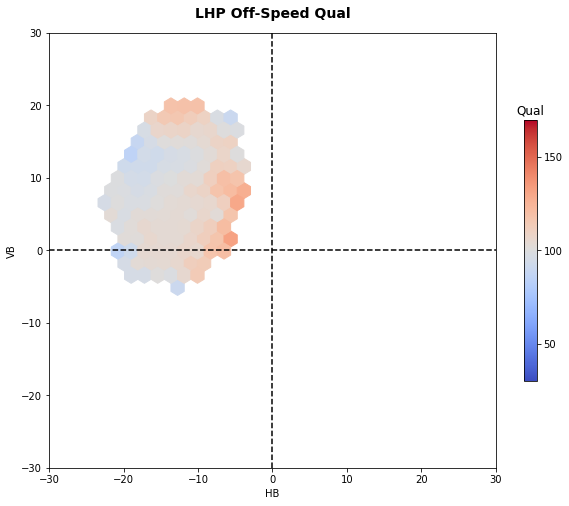

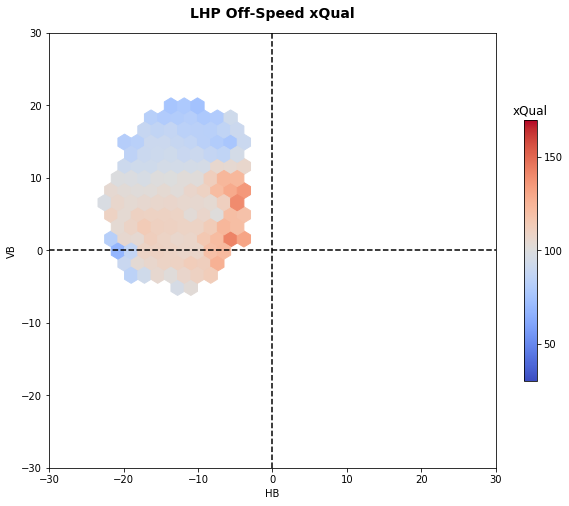

In [27]:
plt.figure(figsize = (10, 8))
plt.hexbin(os_l_stats['pfx_x'], os_l_stats['pfx_z'], C = os_l_stats['Qual'], 
           cmap = 'coolwarm', mincnt = 15, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('Qual'), plt.clim(30, 170)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Off-Speed Qual', fontsize = 14, fontweight = 'bold', pad = 15)

plt.figure(figsize = (10, 8))
plt.hexbin(os_l_stats['pfx_x'], os_l_stats['pfx_z'], C = os_l_stats['xQual'], 
           cmap = 'coolwarm', mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [50,100, 150], shrink = .6)
cb.ax.set_title('xQual'), plt.clim(30, 170)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Off-Speed xQual', fontsize = 14, fontweight = 'bold', pad = 15);

# Save to CSV

In [28]:
pitch_quality = pd.concat([fb, bb, os], ignore_index = True)
#pitch_quality.to_csv('../data/pitch-quality.csv')

In [29]:
print(pitch_quality.shape)
pitch_quality.head()

(705434, 44)


,player_name,p_throws,pitch_type,velo,pfx_x,pfx_z,rv_x,FF_count_x,SI_count_x,FC_count_x,xRV_x,CU_count,SL_count,KC_count,CH_count,FS_count,RV/100,xRV/100,rv_zscore_x,xRV_zscore_x,FF_count_y,SI_count_y,FC_count_y,rv_y,xRV_y,rv_zscore_y,xRV_zscore_y,Qual,xQual,FF_count,SI_count,FC_count,CU_count_x,SL_count_x,KC_count_x,RV/100_zscore,xRV/100_zscore,SL_count_y,CU_count_y,KC_count_y,CH_count_x,FS_count_x,CH_count_y,FS_count_y
0,"Gsellman, Robert",R,SI,94.3,16.20,10.56,-0.110,0.0,1.0,0.0,0.002900,0.0,0.0,0.0,0.0,0.0,-11.0,0.29,0.396318,-0.042276,0.0,246.0,0.0,-1.303,0.385428,-1.665327,-8.302395,98.334673,91.697605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gsellman, Robert",R,SI,94.3,18.24,5.88,-0.047,0.0,1.0,0.0,0.049818,0.0,0.0,0.0,0.0,0.0,-4.7,4.98,0.153780,-0.342346,0.0,246.0,0.0,-1.303,0.385428,-1.665327,-8.302395,98.334673,91.697605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Gsellman, Robert",R,SI,94.2,17.04,6.36,-0.034,0.0,1.0,0.0,0.087840,0.0,0.0,0.0,0.0,0.0,-3.4,8.78,0.103732,-0.585521,0.0,246.0,0.0,-1.303,0.385428,-1.665327,-8.302395,98.334673,91.697605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Gsellman, Robert",R,SI,94.1,15.36,4.32,-0.135,0.0,1.0,0.0,0.016247,0.0,0.0,0.0,0.0,0.0,-13.5,1.62,0.492563,-0.127641,0.0,246.0,0.0,-1.303,0.385428,-1.665327,-8.302395,98.334673,91.697605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Gsellman, Robert",R,SI,93.6,15.48,6.96,-0.135,0.0,1.0,0.0,0.015419,0.0,0.0,0.0,0.0,0.0,-13.5,1.54,0.492563,-0.122342,0.0,246.0,0.0,-1.303,0.385428,-1.665327,-8.302395,98.334673,91.697605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
